In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool

import shap

%matplotlib inline


In [35]:
print(master.columns.tolist())


['Timestamp', 'Red: Hydrogen (ppm)', 'Red: Methane (ppm)', 'Red: Acetylene (ppm)', 'Red: Ethylene (ppm)', 'Red: Ethane (ppm)', 'Red: Carbon Monoxide (ppm)', 'Red: Carbon Dioxide (ppm)', 'Red: Oxygen (ppm)', 'Red: Water (ppm)', 'Yellow: Hydrogen (ppm)', 'Yellow: Methane (ppm)', 'Yellow: Acetylene (ppm)', 'Yellow: Ethylene (ppm)', 'Yellow: Ethane (ppm)', 'Yellow: Carbon Monoxide (ppm)', 'Yellow: Carbon Dioxide (ppm)', 'Yellow: Oxygen (ppm)', 'Yellow: Water (ppm)', 'Blue: Hydrogen (ppm)', 'Blue: Methane (ppm)', 'Blue: Acetylene (ppm)', 'Blue: Ethylene (ppm)', 'Blue: Ethane (ppm)', 'Blue: Carbon Monoxide (ppm)', 'Blue: Carbon Dioxide (ppm)', 'Blue: Oxygen (ppm)', 'Blue: Water (ppm)', 'BLUE: Hydrogen (ppm)', 'BLUE: Methane (ppm)', 'BLUE: Acetylene (ppm)', 'BLUE: Ethylene (ppm)', 'BLUE: Ethane (ppm)', 'BLUE: Carbon Monoxide (ppm)', 'BLUE: Carbon Dioxide (ppm)', 'BLUE: Oxygen (ppm)', 'BLUE: Water (ppm)', 'YELLOW: Hydrogen (ppm)', 'YELLOW: Methane (ppm)', 'YELLOW: Acetylene (ppm)', 'YELLOW: Et

In [36]:
import os

os.chdir(r"C:\Users\dayrb\Desktop\DGA_Project")



In [37]:
MASTER_CSV = "data/master_dataset.csv"
PARSED_CSV = "data/parsed_table.csv"

import pandas as pd
df = pd.read_csv(PARSED_CSV)
master = pd.read_csv(MASTER_CSV)


Current working directory: C:\Users\dayrb\Desktop\DGA_Project
1) Loading data...
2) Detecting anomalies...
   → Anomalies found: 9055 / 316203
3) Performing KMeans clustering...
4) Plotting results...


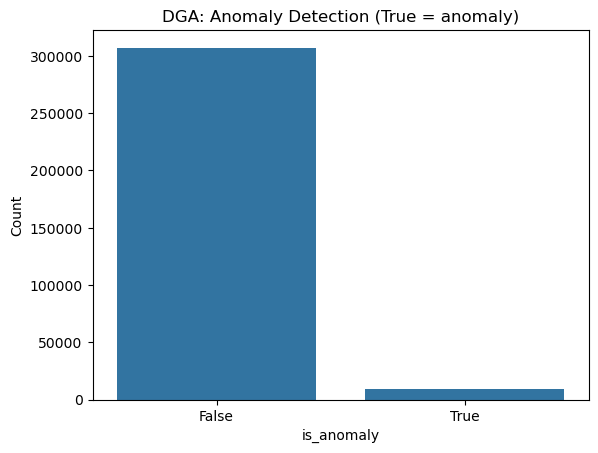

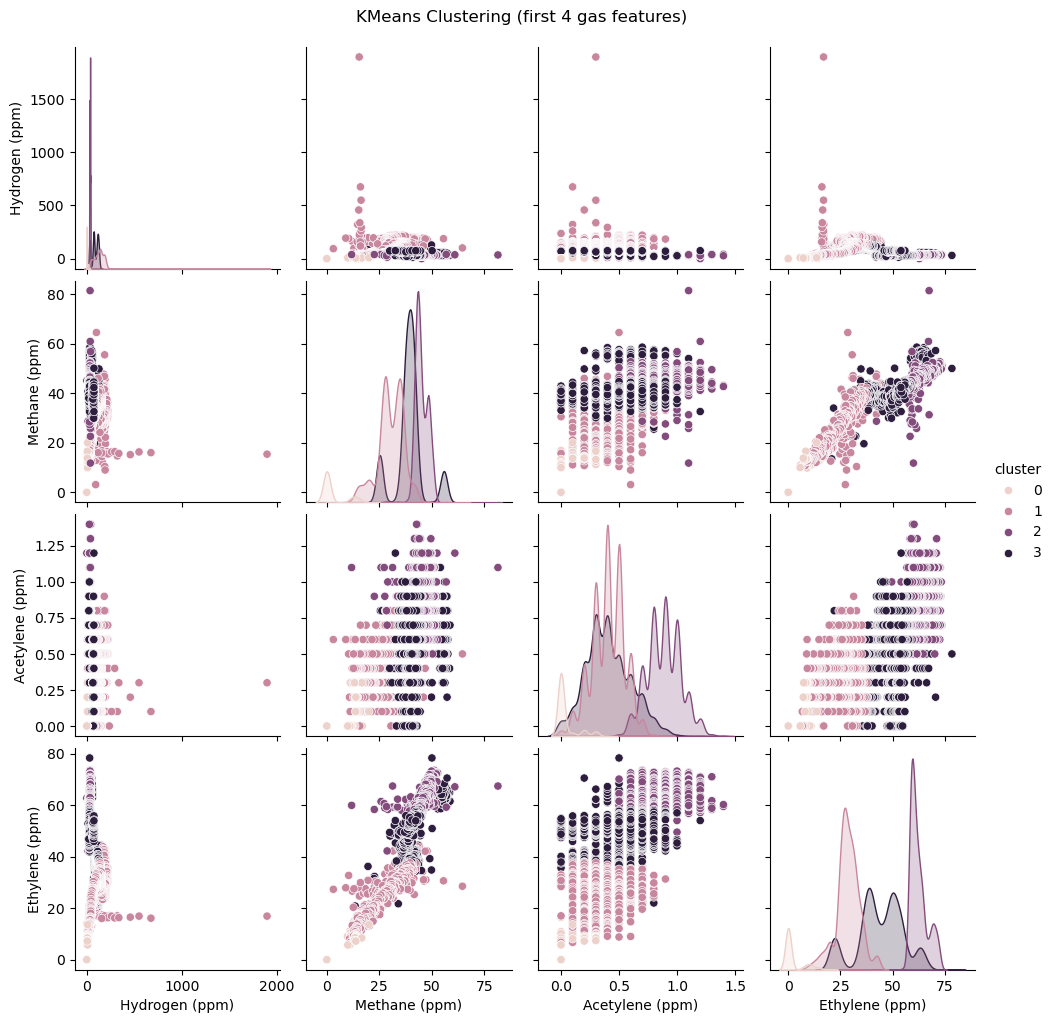

5) Results saved to: data/master_with_unsupervised_labels.csv


In [39]:
#  Unsupervised DGA Analysis 

import os

os.chdir(r"C:\Users\dayrb\Desktop\DGA_Project")
print("Current working directory:", os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


MASTER_CSV = "data/master_dataset.csv"

# Загрузка данных и выбор базовых признаков
def load_data(path: str):
    df = pd.read_csv(path)
    features = [
        "Hydrogen (ppm)", "Methane (ppm)", "Acetylene (ppm)",
        "Ethylene (ppm)", "Ethane (ppm)", "Carbon Monoxide (ppm)",
        "Carbon Dioxide (ppm)", "Oxygen (ppm)", "Water (ppm)"
    ]
    X = df[features].fillna(0)
    return df, X

# Детектирование аномалий через IsolationForest
def detect_anomalies(X: pd.DataFrame, contamination: float = 0.05):
    iso = IsolationForest(
        n_estimators=200,
        contamination=contamination,
        max_samples="auto",
        random_state=42,
        n_jobs=-1
    )
    preds = iso.fit_predict(X)  #  1 = normal, -1 = anomaly
    return pd.Series(preds == -1, index=X.index, name="is_anomaly")

# Кластеризация через KMeans
def cluster_data(X: pd.DataFrame, n_clusters: int = 4):
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Xs)
    return pd.Series(labels, index=X.index, name="cluster")

# Визуализация аномалий
def plot_anomalies(df: pd.DataFrame):
    sns.countplot(x="is_anomaly", data=df)
    plt.title("DGA: Anomaly Detection (True = anomaly)")
    plt.xlabel("is_anomaly")
    plt.ylabel("Count")
    plt.show()

# Визуализация кластеров (pairplot по первым 4 газам)
def plot_clusters(df: pd.DataFrame, features: list):
    sns.pairplot(df, hue="cluster", vars=features[:4], diag_kind="kde")
    plt.suptitle("KMeans Clustering (first 4 gas features)", y=1.02)
    plt.show()

def main():
    print("1) Loading data...")
    raw_df, X = load_data(MASTER_CSV)

    print("2) Detecting anomalies...")
    raw_df["is_anomaly"] = detect_anomalies(X, contamination=0.05)
    print(f"   → Anomalies found: {raw_df['is_anomaly'].sum()} / {len(raw_df)}")

    print("3) Performing KMeans clustering...")
    raw_df["cluster"] = cluster_data(X, n_clusters=4)

    print("4) Plotting results...")
    plot_anomalies(raw_df)
    plot_clusters(raw_df, X.columns.tolist())

    out_csv = "data/master_with_unsupervised_labels.csv"
    raw_df.to_csv(out_csv, index=False)
    print("5) Results saved to:", out_csv)


main()


Колонка с реальными метками не найдена. Покажем сырые примеры.

Примеры по каждому кластеру:

--- Cluster 0:


,Timestamp,Red: Hydrogen (ppm),Red: Methane (ppm),Red: Acetylene (ppm),Red: Ethylene (ppm),Red: Ethane (ppm),Red: Carbon Monoxide (ppm),Red: Carbon Dioxide (ppm),Red: Oxygen (ppm),Red: Water (ppm),...,1MA-X001-1C: Methane (ppm),1MA-X001-1C: Acetylene (ppm),1MA-X001-1C: Ethylene (ppm),1MA-X001-1C: Ethane (ppm),1MA-X001-1C: Carbon Monoxide (ppm),1MA-X001-1C: Carbon Dioxide (ppm),1MA-X001-1C: Oxygen (ppm),1MA-X001-1C: Water (ppm),is_anomaly,cluster
227950,22/09/2014 21:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0
49383,18/06/2014 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0
149100,11/01/2012 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0
24872,30/01/2015 11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0
33452,06/05/2011 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0



--- Cluster 1:


,Timestamp,Red: Hydrogen (ppm),Red: Methane (ppm),Red: Acetylene (ppm),Red: Ethylene (ppm),Red: Ethane (ppm),Red: Carbon Monoxide (ppm),Red: Carbon Dioxide (ppm),Red: Oxygen (ppm),Red: Water (ppm),...,1MA-X001-1C: Methane (ppm),1MA-X001-1C: Acetylene (ppm),1MA-X001-1C: Ethylene (ppm),1MA-X001-1C: Ethane (ppm),1MA-X001-1C: Carbon Monoxide (ppm),1MA-X001-1C: Carbon Dioxide (ppm),1MA-X001-1C: Oxygen (ppm),1MA-X001-1C: Water (ppm),is_anomaly,cluster
38773,24/07/2012 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1
39064,06/06/2012 07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1
35754,24/10/2014 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1
38822,16/07/2012 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1
36122,26/06/2014 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1



--- Cluster 2:


,Timestamp,Red: Hydrogen (ppm),Red: Methane (ppm),Red: Acetylene (ppm),Red: Ethylene (ppm),Red: Ethane (ppm),Red: Carbon Monoxide (ppm),Red: Carbon Dioxide (ppm),Red: Oxygen (ppm),Red: Water (ppm),...,1MA-X001-1C: Methane (ppm),1MA-X001-1C: Acetylene (ppm),1MA-X001-1C: Ethylene (ppm),1MA-X001-1C: Ethane (ppm),1MA-X001-1C: Carbon Monoxide (ppm),1MA-X001-1C: Carbon Dioxide (ppm),1MA-X001-1C: Oxygen (ppm),1MA-X001-1C: Water (ppm),is_anomaly,cluster
41065,21/06/2011 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2
41432,21/04/2011 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2
39964,21/12/2011 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2
40160,19/11/2011 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2
39886,03/01/2012 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2



--- Cluster 3:


,Timestamp,Red: Hydrogen (ppm),Red: Methane (ppm),Red: Acetylene (ppm),Red: Ethylene (ppm),Red: Ethane (ppm),Red: Carbon Monoxide (ppm),Red: Carbon Dioxide (ppm),Red: Oxygen (ppm),Red: Water (ppm),...,1MA-X001-1C: Methane (ppm),1MA-X001-1C: Acetylene (ppm),1MA-X001-1C: Ethylene (ppm),1MA-X001-1C: Ethane (ppm),1MA-X001-1C: Carbon Monoxide (ppm),1MA-X001-1C: Carbon Dioxide (ppm),1MA-X001-1C: Oxygen (ppm),1MA-X001-1C: Water (ppm),is_anomaly,cluster
37858,24/12/2012 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3
37658,26/01/2013 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3
43130,04/08/2010 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3
43379,24/07/2010 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3
35132,07/04/2015 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3


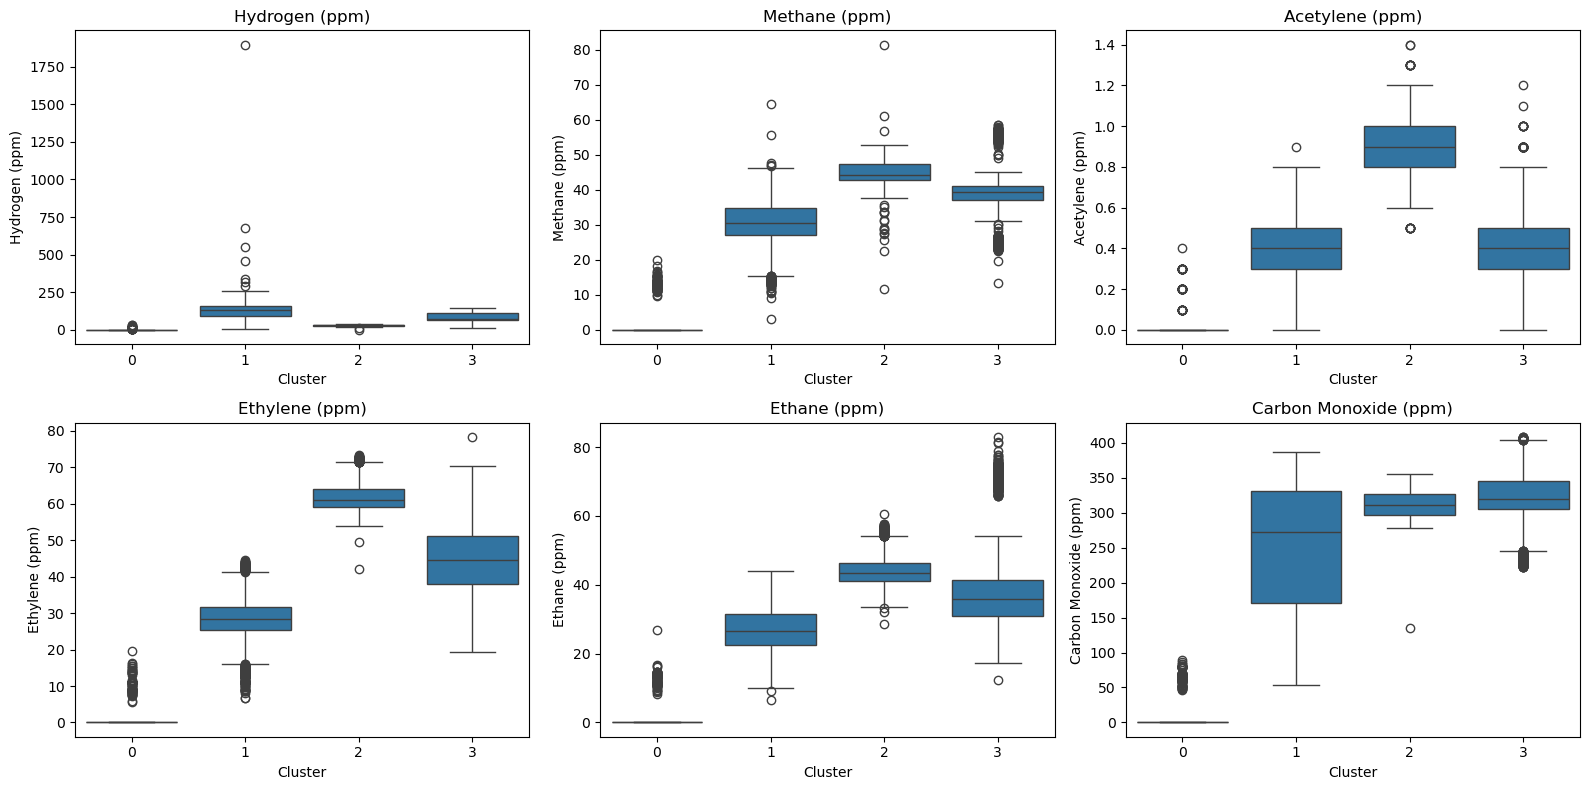

In [40]:
#  Валидация кластеров 
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/master_with_unsupervised_labels.csv")

# в df есть реальная метка отказа, например FaultType или Type, то:
label_col = None
for candidate in ("FaultType", "Type", "Label"):
    if candidate in df.columns:
        label_col = candidate
        break

if label_col:
    print(f"Распределение реальных меток ({label_col}) по кластерам:\n")
    for cl in sorted(df["cluster"].unique()):
        vc = df[df["cluster"] == cl][label_col].value_counts(normalize=True)
        print(f"Cluster {cl}:\n", (vc*100).round(1).astype(str) + "%", "\n")
else:
    print("Колонка с реальными метками не найдена. Покажем сырые примеры.\n")

#  Случайные примеры по кластеру
print("Примеры по каждому кластеру:\n")
for cl in sorted(df["cluster"].unique()):
    print(f"--- Cluster {cl}:")
    display(df[df["cluster"] == cl].sample(5))
    print()

# Боксплоты ключевых газов по кластерам
features = [
    "Hydrogen (ppm)", "Methane (ppm)", "Acetylene (ppm)",
    "Ethylene (ppm)", "Ethane (ppm)", "Carbon Monoxide (ppm)"
]
plt.figure(figsize=(16, 8))
for i, feat in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="cluster", y=feat, data=df)
    plt.title(feat)
    plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


,Hydrogen_total,Methane_total,Acetylene_total,Ethylene_total,ratio_H2_CH4,ratio_C2H2_C2H4,ratio_ROGERS,cluster,is_anomaly
0,0.1,5.8,0.5,0.0,0.017241,NaN,0.086207,0,False
1,0.0,8.6,0.8,0.0,0.000000,NaN,0.093023,0,False
2,0.0,9.2,0.7,0.0,0.000000,NaN,0.108696,0,False
3,0.0,4.6,0.6,0.0,0.000000,NaN,0.130435,0,False
4,0.0,10.2,0.9,0.0,0.000000,NaN,0.088235,0,False
5,0.0,6.9,0.8,0.0,0.000000,NaN,0.115942,0,False
6,0.0,7.2,0.4,0.0,0.000000,NaN,0.055556,0,False
7,0.0,7.4,0.8,0.0,0.000000,NaN,0.108108,0,False
8,0.0,5.4,1.0,0.0,0.000000,NaN,0.185185,0,False
9,0.0,5.9,0.9,0.0,0.000000,NaN,0.152542,0,False


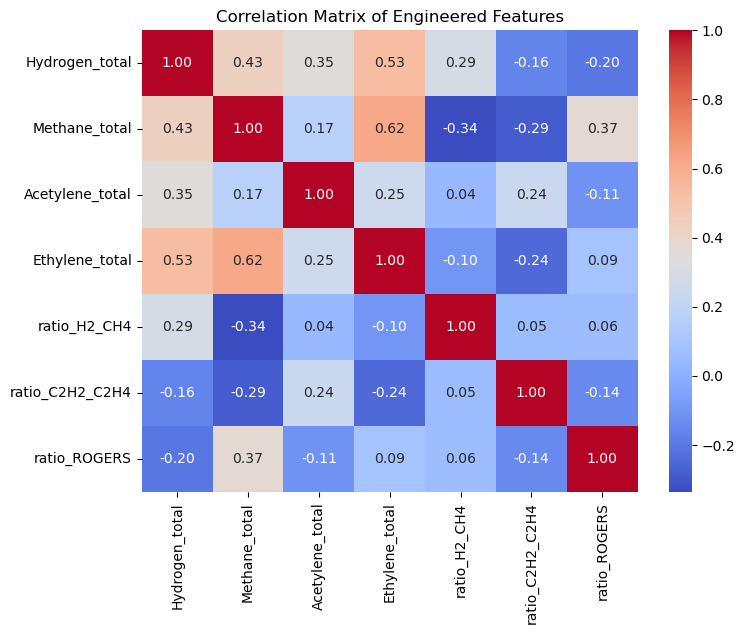

In [41]:
# Feature Engineering & EDA
%matplotlib inline

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/master_with_unsupervised_labels.csv")


gases = [
    'Hydrogen', 'Methane', 'Acetylene', 'Ethylene',
    'Ethane', 'Carbon Monoxide', 'Carbon Dioxide',
    'Oxygen', 'Water'
]
for gas in gases:
    # найдём все колонки вида "...<Gas> (ppm)"
    cols = [c for c in df.columns if re.match(rf".*{gas} \(ppm\)$", c)]
    df[f"{gas}_total"] = df[cols].sum(axis=1)

# Вычисление DGA-индексов
# Заменяем 0 на np.nan в знаменателе, чтобы не резать на ноль
df['ratio_H2_CH4']    = df['Hydrogen_total']    / df['Methane_total'].replace(0, np.nan)
df['ratio_C2H2_C2H4'] = df['Acetylene_total']   / df['Ethylene_total'].replace(0, np.nan)
df['ratio_ROGERS']    = (
    df['Ethylene_total'] + df['Ethane_total'] + df['Acetylene_total']
) / df['Methane_total'].replace(0, np.nan)

# Преобразование Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
df['year']  = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month

# новые признаки
display(df[[
    'Hydrogen_total','Methane_total','Acetylene_total','Ethylene_total',
    'ratio_H2_CH4','ratio_C2H2_C2H4','ratio_ROGERS',
    'cluster','is_anomaly'
]].head(10))

# Тепловая карта корреляций
corr_feats = [
    'Hydrogen_total','Methane_total','Acetylene_total','Ethylene_total',
    'ratio_H2_CH4','ratio_C2H2_C2H4','ratio_ROGERS'
]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of Engineered Features")
plt.show()


Working dir: C:\Users\dayrb\Desktop\DGA_Project
Drop features corr>0.7: ['Ethane_total', 'Carbon Dioxide_total']
Final features used: ['Hydrogen_total', 'Methane_total', 'Acetylene_total', 'Ethylene_total', 'Carbon Monoxide_total', 'Oxygen_total', 'Water_total', 'ratio_H2_CH4', 'ratio_C2H2_C2H4', 'ratio_ROGERS']
0:	learn: 1.1080993	test: 1.1079186	best: 1.1079186 (0)	total: 130ms	remaining: 25.9s
50:	learn: 0.0067871	test: 0.0065931	best: 0.0065931 (50)	total: 5.7s	remaining: 16.7s
100:	learn: 0.0009971	test: 0.0009568	best: 0.0009568 (100)	total: 11.5s	remaining: 11.3s
150:	learn: 0.0006063	test: 0.0006223	best: 0.0006223 (150)	total: 17.3s	remaining: 5.61s
199:	learn: 0.0004911	test: 0.0005367	best: 0.0005365 (196)	total: 22.2s	remaining: 0us

bestTest = 0.0005365319094
bestIteration = 196

Shrink model to first 197 iterations.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     61491
           1       0.99 

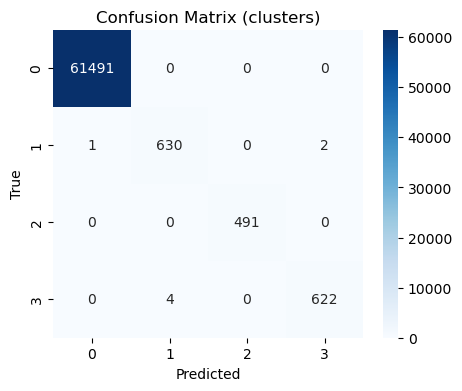

Model saved as ./catboost_cluster_predictor.cb


In [45]:
# Pseudo-Supervised Pipeline: FE → CatBoost → Save Model 
%matplotlib inline

import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier


os.chdir(r"C:\Users\dayrb\Desktop\DGA_Project")
print("Working dir:", os.getcwd())


df_master   = pd.read_csv("data/master_dataset.csv")
df_clusters = pd.read_csv("data/master_with_unsupervised_labels.csv")[["cluster","is_anomaly"]]
df = pd.concat([df_master, df_clusters], axis=1)

Feature-Engineering: агрегируем все ppm-колонки по газам
gases = [
    'Hydrogen','Methane','Acetylene','Ethylene',
    'Ethane','Carbon Monoxide','Carbon Dioxide',
    'Oxygen','Water'
]
for gas in gases:
    cols = [c for c in df.columns if gas in c and '(ppm)' in c]
    df[f"{gas}_total"] = df[cols].sum(axis=1)

# Вычисляем классические DGA-индексы
df['ratio_H2_CH4']    = df['Hydrogen_total']    / df['Methane_total'].replace(0, np.nan)
df['ratio_C2H2_C2H4'] = df['Acetylene_total']   / df['Ethylene_total'].replace(0, np.nan)
df['ratio_ROGERS']    = (
    df['Ethylene_total'] + df['Ethane_total'] + df['Acetylene_total']
) / df['Methane_total'].replace(0, np.nan)

# Отбор признаков: удаляем сильно коррелированные (_total и ratio_)
candidates = [c for c in df.columns if c.endswith('_total') or c.startswith('ratio_')]
corr = df[candidates].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.7)]
print("Drop features corr>0.7:", to_drop)

features = [c for c in candidates if c not in to_drop]
print("Final features used:", features)

# Подготовка X и y (псевдометка = cluster)
X = df[features].fillna(0)
y = df['cluster']

# Разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Обучение CatBoostClassifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=50
)
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    early_stopping_rounds=20
)

# Оценка качества
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (clusters)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Сохраняем модель рядом с кодом
model_file = "catboost_cluster_predictor.cb"
model.save_model(model_file)
print(f"Model saved as ./{model_file}")


In [46]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from catboost import CatBoostClassifier

# X, y — features, псевдо-лейбл = cluster
model = CatBoostClassifier(
    iterations=200, learning_rate=0.1, depth=6,
    random_seed=42, verbose=False
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    model, X, y, cv=cv, scoring='accuracy', n_jobs=-1
)
print("CV accuracy:", scores)
print("Mean ± std:", scores.mean(), "±", scores.std())


CV accuracy: [0.99984187 0.99982606 0.99981025 0.9998735  0.99984187]
Mean ± std: 0.9998387113276831 ± 2.0976948394545318e-05


In [51]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Делим по времени
df_time = df.sort_values("Timestamp").reset_index(drop=True)
cut = int(len(df_time) * 0.7)

X_time = df_time[features].fillna(0)
y_time = df_time["cluster"]

X_train_ts, X_test_ts = X_time.iloc[:cut], X_time.iloc[cut:]
y_train_ts, y_test_ts = y_time.iloc[:cut], y_time.iloc[cut:]

# Загружаем ранее сохранённую модель
model = CatBoostClassifier()
model.load_model("catboost_cluster_predictor.cb")

# Предсказываем
y_pred = model.predict(X_test_ts)

# Выводим честную accuracy
acc = accuracy_score(y_test_ts, y_pred)
print("Time-split accuracy:", acc)


Time-split accuracy: 0.9998524156397255


Working dir: C:\Users\dayrb\Desktop\DGA_Project
Features used: ['Hydrogen_total', 'Methane_total', 'Acetylene_total', 'Ethylene_total', 'Ethane_total', 'Carbon Monoxide_total', 'Carbon Dioxide_total', 'Oxygen_total', 'Water_total', 'ratio_H2_CH4', 'ratio_C2H2_C2H4', 'ratio_ROGERS']
0:	learn: 1.2421434	test: 1.2420859	best: 1.2420859 (0)	total: 190ms	remaining: 56.9s
100:	learn: 0.0070961	test: 0.0069437	best: 0.0069437 (100)	total: 11.4s	remaining: 22.4s
200:	learn: 0.0009398	test: 0.0009440	best: 0.0009440 (200)	total: 22.8s	remaining: 11.2s
299:	learn: 0.0005654	test: 0.0006213	best: 0.0006212 (298)	total: 34s	remaining: 0us

bestTest = 0.0006212081967
bestIteration = 298

Shrink model to first 299 iterations.
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     61491
           1       0.99      1.00      0.99       633
           2       1.00      1.00      1.00       491
           3       1.00      0.99    

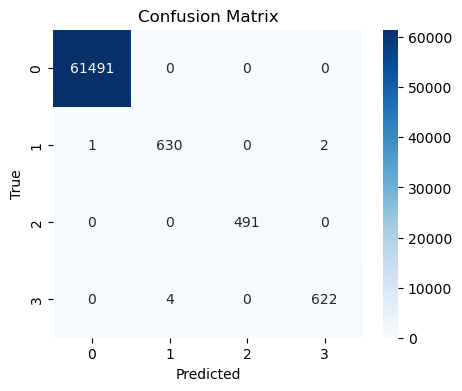

Model saved: ./catboost_supervised.cb


In [54]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

if __name__ == "__main__":
    os.chdir(r"C:\Users\dayrb\Desktop\DGA_Project")
    print("Working dir:", os.getcwd())

  
    df_master   = pd.read_csv("data/master_dataset.csv")
    df_clusters = pd.read_csv("data/master_with_unsupervised_labels.csv")[["cluster","is_anomaly"]]
    df = pd.concat([df_master, df_clusters], axis=1)

    Feature-Engineering: агрегируем ppm по каждому газу
    gases = ['Hydrogen','Methane','Acetylene','Ethylene','Ethane',
             'Carbon Monoxide','Carbon Dioxide','Oxygen','Water']
    for gas in gases:
        cols = [c for c in df.columns if gas in c and '(ppm)' in c]
        df[f"{gas}_total"] = df[cols].sum(axis=1)

    # Считаем DGA-индексы
    df['ratio_H2_CH4']    = df['Hydrogen_total']    / df['Methane_total'].replace(0,np.nan)
    df['ratio_C2H2_C2H4'] = df['Acetylene_total']   / df['Ethylene_total'].replace(0,np.nan)
    df['ratio_ROGERS']    = (
        df['Ethylene_total'] + df['Ethane_total'] + df['Acetylene_total']
    ) / df['Methane_total'].replace(0,np.nan)

    # Отбор признаков: все *_total и ratio_* 
    features = [c for c in df.columns if c.endswith("_total") or c.startswith("ratio_")]
    print("Features used:", features)

    # Лейбл: псевдо (cluster) или подмените на FaultType
    y_col = "cluster"
    X = df[features].fillna(0)
    y = df[y_col]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Обучение CatBoostClassifier
    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        random_seed=42,
        verbose=100,
        allow_writing_files=False
    )
    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        use_best_model=True,
        early_stopping_rounds=30
    )

    # Оценка
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Сохранение модели рядом с кодом
    model_file = "catboost_supervised.cb"
    model.save_model(model_file)
    print(f"Model saved: ./{model_file}")


In [12]:
import os
import pickle
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
from tqdm.auto import tqdm
from tabulate import tabulate


BASE_DIR    = r"C:\Users\dayrb\Desktop\DGA_Project\data"
DIRTY_CSV   = os.path.join(BASE_DIR, "dirty_reports.csv")
INDEX_PATH  = os.path.join(BASE_DIR, "nn_index.pkl")
META_PATH   = os.path.join(BASE_DIR, "dirty_reports_meta.pkl")
EMBED_MODEL = "all-MiniLM-L6-v2"
TOP_K       = 5


def build_index(
    dirty_csv: str = DIRTY_CSV,
    index_path: str = INDEX_PATH,
    meta_path:  str = META_PATH,
    model_name: str = EMBED_MODEL
):
    if not os.path.exists(dirty_csv):
        raise FileNotFoundError(f" Файл не найден: {dirty_csv}")

    print(f" Загружаем отчёты из `{dirty_csv}`...")
    df = pd.read_csv(dirty_csv)
    texts = df["dirty_report"].fillna("").tolist()
    print(f"   ↳ всего строк: {len(texts)}\n")

    print(" Кодируем тексты в эмбеддинги…")
    encoder = SentenceTransformer(model_name)
    embeddings = encoder.encode(
        texts,
        batch_size=64,
        show_progress_bar=True,
        convert_to_numpy=True
    )

    print("\n Строим NearestNeighbors индекс…")
    nn = NearestNeighbors(
        n_neighbors=TOP_K,
        metric="cosine",
        algorithm="brute",
        n_jobs=-1
    )
    nn.fit(embeddings)

    print("\n Сохраняем индекс и тексты…")
    for fn, obj in tqdm(
        [(index_path, nn), (meta_path, texts)],
        desc="Saving files",
        unit="file"
    ):
        with open(fn, "wb") as f:
            pickle.dump(obj, f)

    print(f"\n Индекс сохранён → `{index_path}`")
    print(f" Метаданные сохранены → `{meta_path}`\n")

def search_similar(
    query: str,
    index_path: str = INDEX_PATH,
    meta_path:  str = META_PATH,
    model_name: str = EMBED_MODEL,
    top_k: int = TOP_K
) -> pd.DataFrame:
    print(f" Загружаем индекс из `{index_path}` и метаданные из `{meta_path}`…")
    with open(index_path, "rb") as f:
        nn: NearestNeighbors = pickle.load(f)
    with open(meta_path, "rb") as f:
        texts: list[str] = pickle.load(f)

    print("\n Кодируем запрос в эмбеддинг…")
    encoder = SentenceTransformer(model_name)
    q_emb = encoder.encode([query], show_progress_bar=True, convert_to_numpy=True)

    print(f"\n Ищем топ-{top_k} похожих отчётов…")
    dists, idxs = nn.kneighbors(q_emb, n_neighbors=top_k)

    rows = []
    for dist, idx in zip(dists[0], idxs[0]):
        rows.append({
            "distance": float(dist),
            "report": texts[idx]
        })
    return pd.DataFrame(rows)


if __name__ == "__main__":
    build_index()

    my_query = "Observed H2 at 120 ppm, CH4 at 30 ppm, slight C2H2 presence"
    df_top = search_similar(my_query, top_k=TOP_K)

    print("\n Top 5 similar reports:\n")
    print(tabulate(df_top, headers="keys", tablefmt="psql", showindex=False))


 Загружаем отчёты из `C:\Users\dayrb\Desktop\DGA_Project\data\dirty_reports.csv`...
   ↳ всего строк: 200

 Кодируем тексты в эмбеддинги…


Batches:   0%|          | 0/4 [00:00<?, ?it/s]


 Строим NearestNeighbors индекс…

 Сохраняем индекс и тексты…


Saving files:   0%|          | 0/2 [00:00<?, ?file/s]


 Индекс сохранён → `C:\Users\dayrb\Desktop\DGA_Project\data\nn_index.pkl`
 Метаданные сохранены → `C:\Users\dayrb\Desktop\DGA_Project\data\dirty_reports_meta.pkl`

 Загружаем индекс из `C:\Users\dayrb\Desktop\DGA_Project\data\nn_index.pkl` и метаданные из `C:\Users\dayrb\Desktop\DGA_Project\data\dirty_reports_meta.pkl`…

 Кодируем запрос в эмбеддинг…


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 Ищем топ-5 похожих отчётов…

 Top 5 similar reports:

+------------+--------------------------------------------------------+
|   distance | report                                                 |
|------------+--------------------------------------------------------|
|   0.216648 | H₂ level at 0.0 ppm; CH₄: 4.7 ppm; C₂H₂ about 0.5 ppm. |
|   0.218826 | H₂ level at 0.0 ppm; CH₄: 4.0 ppm; C₂H₂ about 0.7 ppm. |
|   0.23052  | H₂ level at 0.0 ppm; CH₄: 3.8 ppm; C₂H₂ about 0.6 ppm. |
|   0.231157 | H₂ level at 0.0 ppm; CH₄: 3.6 ppm; C₂H₂ about 0.9 ppm. |
|   0.231618 | H₂ level at 0.0 ppm; CH₄: 5.9 ppm; C₂H₂ about 0.4 ppm. |
+------------+--------------------------------------------------------+
